<div align="center">
  <h1>Regression Gone Wrong*</h1>
    <font color="blue"><a href="https://twitter.com/maxhumber"><h2>@maxhumber</h2></a></font>
  <a href="www.github.com/maxhumber/regression"><h5>www.github.com/maxhumber/regression</h5></a>   
  <h4>Boston • ODSC • May 2, 2019</h4>
</div>

<div align="center">
    <img src="images/ymxb.png" height="600" width="600">
</div>

<div align="center">
    <img src="images/datalol.png" height="600" width="600">
</div>

<div align="center">
    <img src="images/titanic.jpg" height="700" width="700">
</div>

<div align="center">
    <img src="images/hockey_clipart.jpg" height="500" width="500">
</div>

<div align="center">
    <img src="images/toronto.jpg" height="800" width="800">
</div>

<div align="center">
    <img src="images/bruins.jpg" height="700" width="700">
</div>

<div align="center">
    <img src="images/leafs_ice.jpg" height="600" width="600">
</div>

<div align="center">
    <b><font size="+10">Regression 101</font></b>
</div>

In [1]:
# step 1:
import pandas as pd

In [2]:
# step 2:
df = pd.read_csv('data/skaters.csv')
columns = ['name', 'age', 'position', 'goals', 'assists', 'plus_minus', 'shots_on_goal', 'blocks', 'hits']
df = df[columns].dropna()

In [3]:
from IPython.core.display import HTML

def display(df, index=False):
    return HTML(df.to_html(
        index=index,
        classes='table table-responsive table-striped table-bordered'
    ))

display(df.sample(5))

name,age,position,goals,assists,plus_minus,shots_on_goal,blocks,hits
P.K. Subban,20.0,D,0,2,1,4,2.0,1.0
John Tavares,22.0,C,28,19,-2,162,22.0,33.0
Kevin Fiala,20.0,LW,11,5,1,114,14.0,44.0
Kris Letang,27.0,D,11,43,12,197,117.0,131.0
Morgan Rielly,24.0,D,20,52,24,223,114.0,61.0


In [4]:
# step 3 - target:
y = df['goals']
X = df[['age', 'assists', 'plus_minus', 'shots_on_goal', 'blocks', 'hits']]

In [5]:
# step 4:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1993)

In [6]:
# step 5:
from sklearn.linear_model import LinearRegression

In [7]:
# step 6:
model = LinearRegression()

In [8]:
# step 7:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
# step 8:
y_hat = model.predict(X_test)

In [10]:
# step 9:
from sklearn.metrics import r2_score, mean_absolute_error
print(f'R^2: {r2_score(y_test, y_hat):.2f}')
print(f'MAE: {mean_absolute_error(y_test, y_hat):.2f}')

R^2: 0.81
MAE: 2.96


In [13]:
def gif(f, height=250, width=250):
    return HTML(f'<img src="images/{f}" height="{height}" width="{width}">')

gif('go_me.gif')

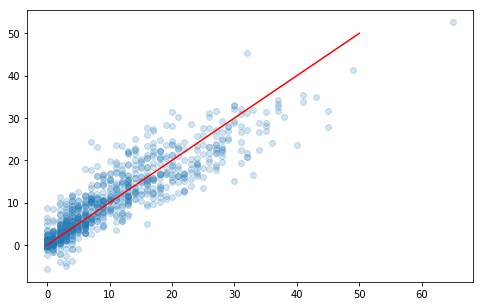

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_hat, alpha=1/5)
plt.plot([0, 50], [0, 50], c='r');

In [15]:
display(df.sample(5))

name,age,position,goals,assists,plus_minus,shots_on_goal,blocks,hits
Shea Weber,32.0,D,6,10,-8,75,59.0,66.0
Dylan Sikura,23.0,C,0,8,2,52,10.0,3.0
Matt Puempel,24.0,LW,6,3,-11,44,12.0,28.0
Connor Carrick,22.0,D,2,6,8,89,79.0,66.0
Jonathan Huberdeau,23.0,C,10,16,-2,86,7.0,18.0


<h1>problems...</h1>
<ol>
    <li>it's nonsense...</li>
    <li>can't extend to new data...</li>
    <li><i>maybe</i> not the right algorithm...</li>
</ol>
<br>
<div align="left">
    <img src="images/oh_no.gif" height="250" width="250">
</div>

<div align="center">
  <h4>Regression Gone Wrong*</h4>
</div>

<div align="center">
    <b><font size="+10" color="red">#YouSuckAtRegression</font></b>
</div>

<div align="center">
    <img src="images/the_show.gif" height="400" width="400">
</div>

<h4>model preview</h4>
<ol>
    <li>Multiple output regression...</li>
    <li>Ordinal regression...</li>
    <li>Poisson regression...</li>
</ol>

<ol>
<li>...to predict player performance next year</li>
<li>...to find diamonds in the rough</li>
<li>...to choose the right side of the Over/Under</li>
</ol>

<div align="center">
    <img src="images/kramer.gif" height="400" width="400">
</div>

<div align="center">
    <h1>Multiple Output Regression</h1>
</div>

<div align="center">
    <img src="images/ymxb.png" height="300" width="300">
</div>
<br>
<div align="center">
    <img src="images/prediction_machine.png" height="400" width="400">
</div>

<div align="center">
    <img src="images/prediction_machine_2.png" height="600" width="600">
</div>

In [16]:
import pandas as pd 

df = pd.read_csv('data/skaters.csv')
# quick clean
df['season_start'] = df['season'].apply(lambda x: int(x[:4]))
df = df.query('season_start >= 2007')
df['position'] = df['position'].apply(
    lambda x: 'Multiple' if '/' in x else x)

In [17]:
Y_columns = [
    'goals', 'assists', 'plus_minus', 
    'shots_on_goal', 'blocks', 'hits']
X_columns = ['position', 'age'] + Y_columns

In [18]:
display(
    df[['name', 'season'] + X_columns]
    .query('name == "Mitch Marner"')
)

name,season,position,age,goals,assists,plus_minus,shots_on_goal,blocks,hits
Mitch Marner,2016-17,C,19.0,19,42,0,176,39.0,41.0
Mitch Marner,2017-18,C,20.0,22,47,-1,194,25.0,31.0
Mitch Marner,2018-19,C,21.0,26,68,22,233,43.0,29.0


In [21]:
# shift everything by a year 
Y = df.groupby('id')[Y_columns].shift(-1)
X = df[X_columns]
# drop out dangling Y rows...
X = X[~pd.isnull(Y).any(axis=1)]
Y = Y.dropna()
# reset index
Y = Y.reset_index(drop=True)
X = X.reset_index(drop=True)
# this is me shifting:
gif('shift.gif', height=150, width=150)

In [22]:
display(X.head(5), index=True)

,position,age,goals,assists,plus_minus,shots_on_goal,blocks,hits
0,C,22.0,0,3,2,9,2.0,0.0
1,D,23.0,0,3,-2,12,9.0,6.0
2,C,18.0,18,34,-2,134,33.0,38.0
3,C,19.0,4,20,3,78,27.0,27.0
4,C,20.0,19,37,-12,178,35.0,72.0


In [23]:
display(Y.head(4), index=True)

,goals,assists,plus_minus,shots_on_goal,blocks,hits
0,0.0,8.0,2.0,52.0,10.0,3.0
1,0.0,6.0,9.0,42.0,35.0,33.0
2,4.0,20.0,3.0,78.0,27.0,27.0
3,19.0,37.0,-12.0,178.0,35.0,72.0


In [24]:
X_train, X_test, Y_train, Y_test = (
    train_test_split(X, Y, test_size=0.2, random_state=42)
)

<div align="center">
    <img src="images/secret_sauce.jpg" height="600" width="600">
</div>

In [25]:
from sklearn_pandas import DataFrameMapper, CategoricalImputer
from sklearn.preprocessing import PolynomialFeatures, LabelBinarizer
from sklearn.impute import SimpleImputer

mapper = DataFrameMapper([
    (['age'], [SimpleImputer(), PolynomialFeatures(include_bias=False)]),
    (['position'], [CategoricalImputer(), LabelBinarizer()]),
    (['goals'], SimpleImputer()),
    (['assists'], SimpleImputer()),
    (['plus_minus'], SimpleImputer()),
    (['shots_on_goal'], SimpleImputer()),
    (['blocks'], SimpleImputer()),
    (['hits'], SimpleImputer())
])

In [26]:
Z_train = mapper.fit_transform(X_train)
Z_test = mapper.transform(X_test)

In [29]:
from sklearn.multioutput import MultiOutputRegressor

multi_model = MultiOutputRegressor(LinearRegression())
multi_model.fit(Z_train, Y_train)

gif('magic.gif')

In [30]:
display(pd.DataFrame(Z_test, columns=mapper.transformed_names_)
    [Y_columns].tail(2),index=True
)

,goals,assists,plus_minus,shots_on_goal,blocks,hits
717,11.0,30.0,15.0,133.0,178.0,27.0
718,15.0,34.0,11.0,170.0,61.0,98.0


In [31]:
display(pd.DataFrame(multi_model.predict(Z_test), columns=Y_columns)
    .tail(2), index=True
)

,goals,assists,plus_minus,shots_on_goal,blocks,hits
717,8.458210,28.477160,6.268463,129.552805,150.222495,28.486686
718,17.329003,30.994235,3.292957,167.443193,52.733255,87.363247


<div align="center">
    <img src="images/deeper.jpg" height="600" width="600">
</div>

In [32]:
y_sog = Y['shots_on_goal']
y_goals = Y['goals']

In [35]:
(X_train, X_test, 
 y_sog_train, y_sog_test, 
 y_goals_train, y_goals_test) = train_test_split(
    X, y_sog, y_goals,
    test_size=0.2, random_state=42
)

gif('mindblown.gif', height="100", width="100")

In [36]:
Z_train = mapper.fit_transform(X_train)
Z_test = mapper.transform(X_test)

In [37]:
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.layers import Dense, Dropout

<div align="center">
    <img src="images/network.png" height="250" width="250">
</div>

<div align="center">
    <img src="images/share.gif" height="250" width="250">
</div>

In [38]:
data_input = Input(shape=(Z_train.shape[1],), dtype='float64', name='last_season')

x = Dense(50, activation='relu')(data_input)
x = Dense(200, activation='relu')(x)
x = Dense(50, activation='relu')(x)

goals_prediction = Dense(1, name='goals')(x)
sog_prediction = Dense(1, name='shots_on_goal')(x)
model = Model(data_input, [goals_prediction, sog_prediction])

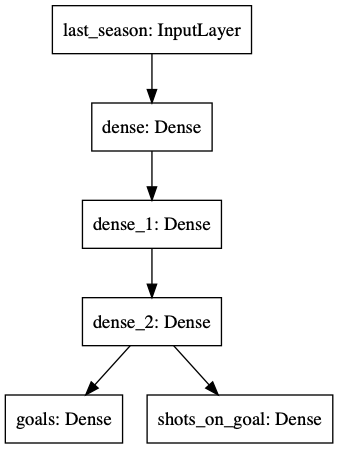

In [39]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [40]:
model.compile(
    optimizer='Nadam',
    loss={'goals': 'mse', 'shots_on_goal': 'mse'},
    loss_weights={'goals': 10, 'shots_on_goal': 1/10},
)
model.fit(Z_train, [y_goals_train, y_sog_train], 
    epochs=10, batch_size=2)

Epoch 1/10
2874/2874 [==============================] - 2s 802us/sample - loss: 1049.8968 - goals_loss: 71.8429 - shots_on_goal_loss: 3314.6824
Epoch 2/10
2874/2874 [==============================] - 2s 632us/sample - loss: 802.2937 - goals_loss: 53.8377 - shots_on_goal_loss: 2639.1702
Epoch 3/10
2874/2874 [==============================] - 2s 632us/sample - loss: 764.1010 - goals_loss: 50.6600 - shots_on_goal_loss: 2575.0105
Epoch 4/10
2874/2874 [==============================] - 2s 632us/sample - loss: 729.0798 - goals_loss: 47.8668 - shots_on_goal_loss: 2504.1208
Epoch 5/10
2874/2874 [==============================] - 2s 639us/sample - loss: 711.1807 - goals_loss: 46.3438 - shots_on_goal_loss: 2477.4294
Epoch 6/10
2874/2874 [==============================] - 2s 659us/sample - loss: 702.8108 - goals_loss: 45.7206 - shots_on_goal_loss: 2456.0461
Epoch 7/10
2874/2874 [==============================] - 2s 614us/sample - loss: 697.4693 - goals_loss: 45.5496 - shots_on_goal_loss: 2419.725

In [41]:
X_test.sample(1).to_dict(orient='list')

{'position': ['C'],
 'age': [21.0],
 'goals': [29],
 'assists': [48],
 'plus_minus': [7],
 'shots_on_goal': [172],
 'blocks': [36.0],
 'hits': [41.0]}

In [42]:
X_new = pd.DataFrame({
    'position': ['C'],
    'age': [29.0],
    'goals': [19],
    'assists': [21],
    'plus_minus': [2],
    'shots_on_goal': [155],
    'blocks': [47.0],
    'hits': [255.0]
})
Z_new = mapper.transform(X_new)
model.predict(Z_new)

[array([[16.49804686]]), array([[139.51257558]])]

In [46]:
y_hat_goals = model.predict(Z_test)[0][:, 0]
y_hat_sog = model.predict(Z_test)[1][:, 0]
preds = pd.DataFrame({
    'goals': y_goals_test,
    'goals_predicted': y_hat_goals,
    'sog': y_sog_test,
    'sog_predicted': y_hat_sog,
})

print(r2_score(preds['goals'], preds['goals_predicted']))
print(r2_score(preds['sog'], preds['sog_predicted']))

# gif('unknown.gif')

0.6069494418760939
0.5762410369870379


<div align="center">
    <img src="images/moneymoney.gif" height="500" width="500">
</div>

In [47]:
df = pd.read_csv('data/draft.csv')
display(df.iloc[:, :10].head())

name,position,adp,goals,assists,plus_minus,powerplay_points,shots_on_goal,hits,blocks
Connor McDavid,C,1,40.2750,69.665000,13.217500,19.75,208.250000,15.0,17.750000
Nikita Kucherov,RW,2,41.5150,56.670000,17.495000,28.50,214.750000,20.0,10.500000
Alex Ovechkin,LW,3,50.2300,39.236667,17.126667,21.00,245.666667,65.0,9.333333
Sidney Crosby,C,4,35.7775,62.445000,14.142500,28.75,197.500000,34.0,15.750000
Brad Marchand,LW,5,38.3900,52.975000,19.537500,20.00,174.250000,25.0,15.750000


<div align="center">
    <img src="images/fantasy.jpg" height="500" width="600">
</div>

<div align="center">
    <img src="images/nhl_blotto.png" height="500" width="800">
</div>

<div align="center">
    <img src="images/nhl_blotto_2b.png" height="500" width="800">
</div>

In [48]:
categories = [
    'goals',
    'assists',
    'plus_minus',
    'powerplay_points',
    'shots_on_goal',
    'hits',
    'blocks',
    'wins',
    'goals_against_average',
    'saves',
    'save_percentage',
    'shutouts'
]

y = df['adp']
X = df[['position'] + categories]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=5)

In [50]:
from sklearn.preprocessing import StandardScaler

mapper = DataFrameMapper([
    (['position'], LabelBinarizer()),
    (['goals'], StandardScaler()),
    (['assists'], StandardScaler()),
    (['plus_minus'], StandardScaler()),
    (['powerplay_points'], StandardScaler()),
    (['shots_on_goal'], StandardScaler()),
    (['hits'], StandardScaler()),
    (['blocks'], StandardScaler()),
    (['wins'], StandardScaler()),
    (['goals_against_average'], StandardScaler()),
    (['saves'], StandardScaler()),
    (['save_percentage'], StandardScaler()),
    (['shutouts'], StandardScaler())])

In [51]:
Z_train = mapper.fit_transform(X_train)
Z_test = mapper.transform(X_test)

In [52]:
model = LinearRegression()
model.fit(Z_train, y_train)
model.predict(Z_test)[:10]

array([ 48.41389296,  55.63518889, -11.75859152,  40.77822351,
       137.50479356, 170.48747709,  89.30467878,  64.04388235,
        94.40890631,  62.47600084])

<div align="center">
    <img src="images/makesnosense.gif" height="300" width="300">
</div>

<div align="center">
    <h1>Ordinal Regression</h1>
</div>

In [53]:
#!pip install mord
from mord import OrdinalRidge

model = OrdinalRidge(fit_intercept=False)

In [54]:
model.fit(Z_train, y_train)

OrdinalRidge(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001)

In [55]:
model.predict(Z_test)[:10] + 1

array([ 48.,  54.,   1.,  37., 134., 164.,  81.,  63.,  87.,  65.])

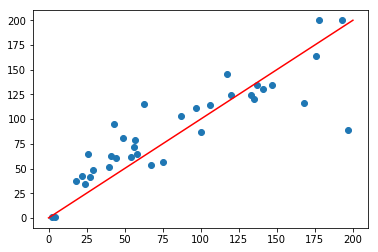

In [56]:
compare = pd.DataFrame({
    'y': y_test, 'yhat': model.predict(Z_test) + 1})

plt.scatter(compare.y, compare.yhat)
plt.plot([0, 200], [0, 200], c='r');

In [57]:
r2_score(compare.y, compare.yhat)

0.7472513693545548

In [58]:
bias = pd.DataFrame({
    'feature': mapper.transformed_names_,
    'coef': model.coef_
}).sort_values('coef')

display(bias[~bias.feature.str.contains('position')])

feature,coef
wins,-53.326332
assists,-43.783531
goals,-39.414865
shots_on_goal,-19.420086
goals_against_average,-12.000836
saves,-6.835524
save_percentage,-6.004746
hits,-5.807997
powerplay_points,-5.614948
plus_minus,-5.508739


<div align="center">
    <img src="images/nhl_blotto_2b.png" height="500" width="800">
</div>

<div align="center">
    <img src="images/nhl_blotto_2.png" height="500" width="800">
</div>

<div align="center">
    <img src="images/my_draft.png" height="500" width="500">
</div>

<div align="center">
    <img src="images/results.png" height="500" width="500">
</div>

<div align="center">
    <img src="images/vegas.gif" height="700" width="700">
</div>

<div align="center">
    <img src="images/over_under.png" height="700" width="700">
</div>

In [59]:
df = pd.read_csv('data/games.csv')
last_year = df.query('season == "2017-18"')

In [60]:
home = df.groupby('home').mean().reset_index().rename(
    columns={'home_goals': 'home_for', 'away_goals': 'home_against'})
away = df.groupby('away').mean().reset_index().rename(
    columns={'home_goals': 'away_against', 'away_goals': 'away_for'})

In [61]:
this_year = df.query('season == "2018-19"')

df = pd.merge(this_year, home, how='left', on='home')
df = pd.merge(df, away, how='left', on='away')

In [62]:
df['home_for*away_against'] = df['home_for'] * df['away_against']
df['away_for*home_against'] = df['away_for'] * df['home_against']
df['goals_total'] = df['home_goals'] + df['away_goals']

In [63]:
y = df['goals_total']
X = df[[
    'home_for', 'home_against', 'away_against', 'away_for',
    'home_for*away_against', 'away_for*home_against'
]]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

0.08740758682223271

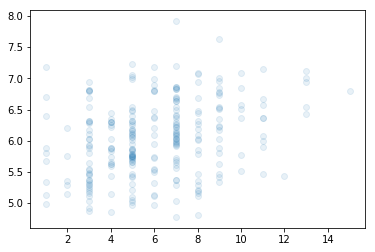

In [65]:
y_hat = model.predict(X_test)
plt.scatter(y_test, y_hat, alpha=1/10);
r2_score(y_test, y_hat)

5.566375992685668
6.029897718332022


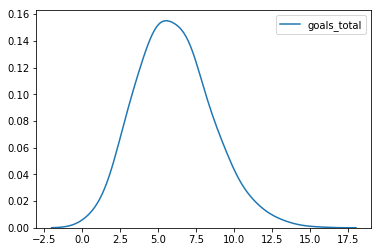

In [66]:
import numpy as np 

print(np.var(y))
print(np.mean(y))

import seaborn as sns
sns.kdeplot(y, bw=1);

<div align="center">
    <h1>Poisson Regression</h1>
</div>

In [67]:
from sklearn.linear_model import PoissonRegression

ImportError: cannot import name 'PoissonRegression' from 'sklearn.linear_model' (/Users/max/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/__init__.py)

<div align="center">
    <img src="images/whyyy.gif" height="300" width="300">
</div>

In [70]:
import statsmodels.api as sm

gif('darkness.gif', height=400, width=400)

In [71]:
X_train_i = sm.add_constant(X_train)

In [72]:
glm_poi = sm.GLM(y_train, X_train_i, family=sm.families.Poisson())
glm_poi = glm_poi.fit()

<div align="center">
    <img src="images/barf.gif" height="300" width="350">
</div>

In [75]:
# https://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator
from sklearn.base import BaseEstimator

gif('rolling.gif')

In [76]:
class PoissonRegression(BaseEstimator):
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept

    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
        if self.fit_intercept:
            self.coef_ = self.model.params[1:]
            self.intercept_ = self.model.params[0]
        else:
            self.coef_ = self.model.params
        return self

    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.model.predict(X)

<div align="center">
    <img src="images/drake.png" height="500" width="500">
</div>

In [77]:
pr = PoissonRegression()
pr.fit(X_train, y_train)
pr.predict(X_test)[:10]

1253    5.066474
1187    6.830212
422     6.772087
976     6.461347
793     5.171348
785     7.232495
23      5.692423
405     5.080402
43      6.075223
582     5.343032
dtype: float64

0.08783648586923143


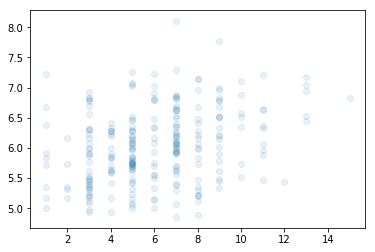

In [78]:
y_hat = pr.predict(X_test)
print(r2_score(y_test, y_hat))
plt.scatter(y_test, y_hat, alpha=1/10);

<div align="center">
    <img src="images/point.gif" height="500" width="500">
</div>

<div align="center">
    <img src="images/dont.gif" height="500" width="500">
</div>

<h1>TL;DL:</h1>
<ol>
    <li>data > algorithm</li>
    <li>don't get cute</li>
    <li>be mindful of the unseen</li>
</ol>

<div align="center">
    <img src="images/thats_all.gif" height="500" width="500">
</div>

<div align="center">
    
<a href="https://twitter.com/maxhumber"><h4>@maxhumber</h4></a></font>
<br>
<a href="https://www.linkedin.com/in/maxhumber/"><h4>/in/maxhumber</h4></a></font><h4>max.humber@gmail.com</h4>

</div>